In [2]:
!pip install librosa

  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached numba-0.61.2-cp311-cp311-win_amd64.whl.metadata (2.9 kB)
  Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl.metadata (16 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-0.5.0.post1-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached msgpack-1.1.1-cp311-cp311-win_amd64.whl.metadata (8.6 kB)
  Using cached llvmlite-0.44.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached msgpack-1.1.1-cp311-cp311-win_amd64.whl (72 kB)
Using cached numba-0.61.2-cp311-cp311-win_amd64.whl (2.8 MB)
Using cached llvmlite-0.44.0-cp311-cp311-win_amd64.whl (30.3 MB)
Using cached pooch-1.


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import librosa
import librosa.display

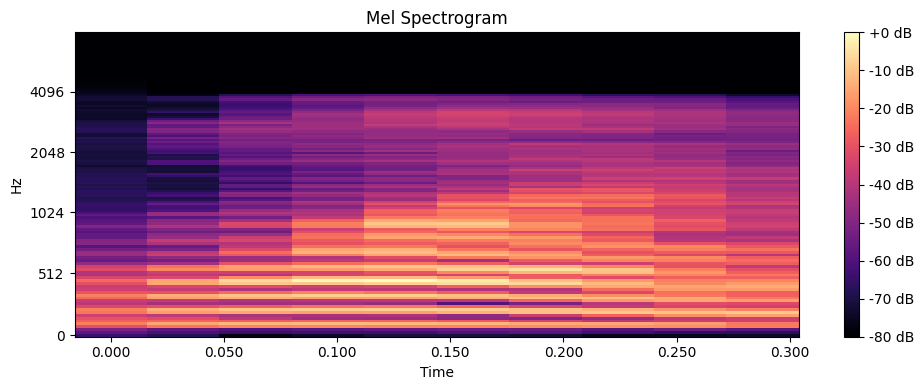

In [13]:
def audio_to_mel_spectrogram(file_path, sr=16000, n_mels=128, max_len=10):
    y, _ = librosa.load(file_path, sr=sr)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)   
    log_mel_spec = log_mel_spec.T
    if log_mel_spec.shape[0] < max_len:
        pad_width = max_len - log_mel_spec.shape[0]
        log_mel_spec = np.pad(log_mel_spec, ((0, pad_width), (0, 0)))
    else:
        log_mel_spec = log_mel_spec[:max_len, :]
    return log_mel_spec  
spec = audio_to_mel_spectrogram("recordings/1_jackson_23.wav")

plt.figure(figsize=(10, 4))
librosa.display.specshow(spec.T, sr=16000, hop_length=512, x_axis='time', y_axis='mel')
plt.title("Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [ ]:
spec.T.shape

In [5]:
# def audio_to_mel_spectrogram(file_path, sr=16000, n_mels=128, max_len=10):
#      y, _ = librosa.load(file_path, sr=sr)
#      mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
#      log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)  # (n_mels, time)
#      log_mel_spec = log_mel_spec.T
#      if log_mel_spec.shape[0] < max_len:
#         pad_width = max_len - log_mel_spec.shape[0]
#         log_mel_spec = np.pad(log_mel_spec, ((0, pad_width), (0, 0)))
#     else:
#         log_mel_spec = log_mel_spec[:max_len, :]
#     return log_mel_spec   
# X = []
# y = []
# for i in os.listdir('./recordings'):
#     X.append(audio_to_mel_spectrogram(f'recordings/{i}'))
#     y.append(int(i[0]))
# X = np.array(X)
# y = np.array(y)
def audio_to_mel_spectrogram(file_path, sr=16000, n_mels=128, max_len=10):
    y, _ = librosa.load(file_path, sr=sr)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)  # (n_mels, time)
    log_mel_spec = log_mel_spec.T
    
    if log_mel_spec.shape[0] < max_len:
        pad_width = max_len - log_mel_spec.shape[0]
        log_mel_spec = np.pad(log_mel_spec, ((0, pad_width), (0, 0)))
    else:
        log_mel_spec = log_mel_spec[:max_len, :]
    
    return log_mel_spec

X = []
y = []
for filename in os.listdir('./recordings'):
    filepath = os.path.join('./recordings', filename)
    
    if not os.path.isfile(filepath) or not filename.endswith('.wav'):  
    
    try:
        X.append(audio_to_mel_spectrogram(filepath))
        y.append(int(filename[0]))  # Assuming label is the first character (e.g., "0_abc.wav")
    except Exception as e:
        print(f"Skipping {filename}: {str(e)}")

X = np.array(X)
y = np.array(y)

IndentationError: expected an indented block after 'if' statement on line 38 (3431986362.py, line 40)

In [6]:
X

NameError: name 'X' is not defined

In [7]:
y

NameError: name 'y' is not defined

In [8]:
X.shape

NameError: name 'X' is not defined

In [9]:
y.shape

NameError: name 'y' is not defined

In [10]:
from keras.utils import to_categorical

In [11]:
y = to_categorical(y, num_classes=10)

NameError: name 'y' is not defined

In [ ]:
y

In [ ]:
X = X.reshape(3000, 10, 128, 1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(2400, 10, 128, 1)

In [24]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(10, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

/Users/satenkarapetyan/Desktop/ML/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1374 - loss: 4.6633 - val_accuracy: 0.2417 - val_loss: 2.0900
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2471 - loss: 2.0466 - val_accuracy: 0.3167 - val_loss: 1.9202
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3322 - loss: 1.7852 - val_accuracy: 0.4300 - val_loss: 1.6073
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4801 - loss: 1.4854 - val_accuracy: 0.5717 - val_loss: 1.3721
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5947 - loss: 1.2399 - val_accuracy: 0.6767 - val_loss: 1.0370
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.9972 - val_accuracy: 0.7600 - val_loss: 0.8294
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7753 - loss: 0.7953 - val_accuracy: 0.7983 - val_loss: 0.7004
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8056 - loss: 0.6618 - val_accuracy: 0.8383 - val_loss:

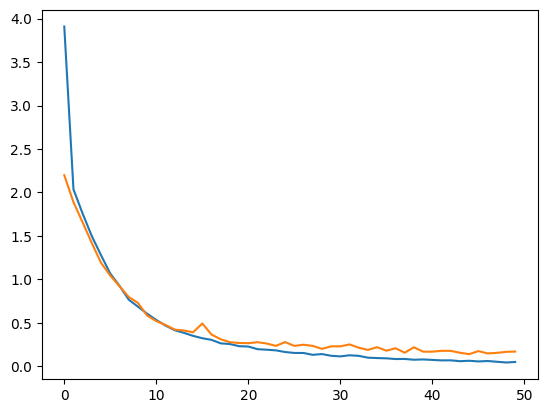

In [20]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

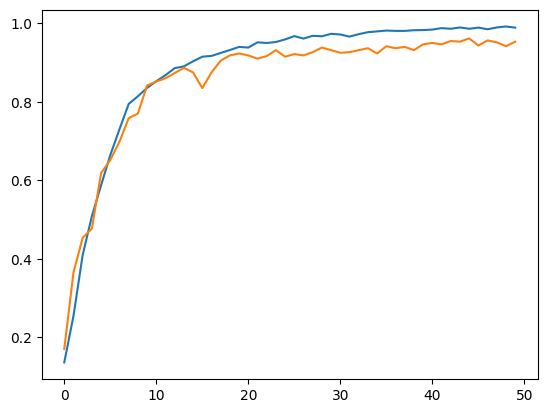

In [21]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

In [28]:
model.save('number_recognizer.h5')